# PCA (Principal Component Analysis)

# Implementação

### Bibliotecas utilizadas

In [2]:
# Bibliotecas utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import time

### Dados utilizados

In [3]:
# Geração de um dataset sintético com 500 features

X, y = make_classification(n_samples=100000, n_features=1000, n_informative=100,
                           n_redundant=500, n_classes=2, random_state=42)

In [4]:
# Inspeção dos dados gerados

print(f'n_linhas, n_colunas de X: {X.shape}')
print(f'n_linhas, n_colunas de X: {y.shape}')

print(f'Dimensões de X: {X.ndim}')
print(f'Dimensões de y: {y.ndim}')

n_linhas, n_colunas de X: (100000, 1000)
n_linhas, n_colunas de X: (100000,)
Dimensões de X: 2
Dimensões de y: 1


In [5]:
# Visualização de X

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-36.469205,-1.754848,1.062921,17.968408,22.481179,0.814358,-17.571410,-21.359116,-0.666416,-39.311066,...,-0.267885,3.493382,-8.133961,1.263342,2.852839,-0.004847,-5.250780,-42.560590,-0.207623,0.207986
1,-43.013023,-1.712915,-0.846287,-70.838157,4.086765,-1.629012,5.604231,-18.010283,0.595137,-3.001491,...,0.150830,-0.966398,-1.397634,-0.708457,1.141132,3.361249,-1.792411,43.489189,-2.398963,-0.981798
2,4.372684,-0.924294,1.055432,-19.721368,9.619650,-1.454115,-20.782047,-14.520253,-0.442481,-6.843783,...,-1.604045,-1.731165,-8.145403,-0.321451,2.163974,26.436324,-6.665523,-6.487041,-1.149262,-0.842410
3,-19.695046,-0.260747,-1.134741,19.843368,-3.817320,0.711969,-32.989738,16.129005,1.867328,-37.260485,...,-0.141334,-2.929239,-4.711547,-1.911446,0.038135,13.801243,4.558739,-47.133110,0.012212,-1.578762
4,-18.473750,-1.570423,1.670385,-21.691181,42.945531,1.239184,-30.126282,26.385063,-1.634253,-19.695800,...,1.987024,0.921678,0.540951,0.653479,1.330736,14.276905,1.846400,-1.038765,-0.343697,0.300562


In [6]:
# Distribuição das classes

pd.DataFrame(y).value_counts()

0
0    50035
1    49965
Name: count, dtype: int64

# Padronização dos dados

- Aplicação do Standard scaler, que deixa a média = 0 e desvio padrão = 1
- Para cada feature (coluna), ele aplica: `z = (x - μ) / σ`

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Visualizando a transformação

print('Analisando a transformação das primeiras 10 features')
print('Feature | Original Mean | Original Std | Scaled Mean | Scaled Std')
print('-' * 65)

for i in range(min(10, X.shape[1])):
    print(f'F{i+1:2}     | {np.mean(X[:, i]):12.4f} | {np.std(X[:, i]):11.4f} | {np.mean(X_scaled[:, i]):10.6f} | {np.std(X_scaled[:, i]):9.6f}')

Analisando a transformação das primeiras 10 features
Feature | Original Mean | Original Std | Scaled Mean | Scaled Std
-----------------------------------------------------------------
F 1     |      -2.2974 |     33.0072 |  -0.000000 |  1.000000
F 2     |      -0.0025 |      0.9976 |   0.000000 |  1.000000
F 3     |      -0.0037 |      1.0021 |   0.000000 |  1.000000
F 4     |      -0.9187 |     36.2062 |   0.000000 |  1.000000
F 5     |       1.8863 |     35.4250 |   0.000000 |  1.000000
F 6     |      -0.0001 |      1.0020 |  -0.000000 |  1.000000
F 7     |      -2.0882 |     32.1749 |   0.000000 |  1.000000
F 8     |       3.1624 |     30.6175 |   0.000000 |  1.000000
F 9     |       0.0031 |      1.0005 |  -0.000000 |  1.000000
F10     |      -1.5904 |     33.3537 |   0.000000 |  1.000000


# Aplicação do PCA

In [9]:
# Demonstração do quanto ele mantém a variância explicada mesmo excluindo (reduzindo) as features redundantes

In [10]:
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum.shape

(1000,)

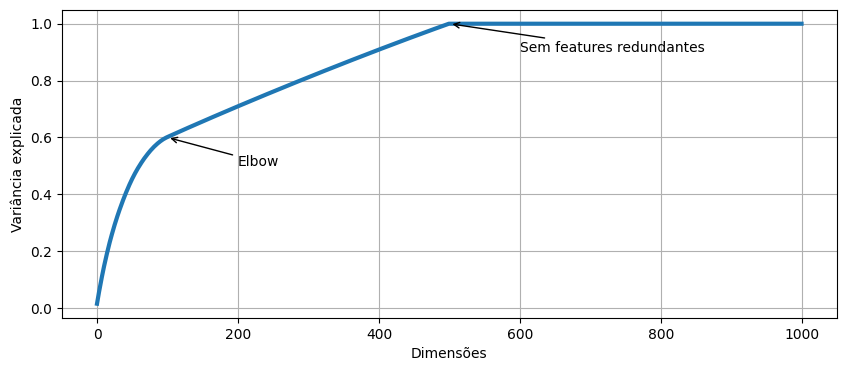

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(cumsum, linewidth=3)
plt.xlabel('Dimensões')
plt.ylabel('Variância explicada')
plt.annotate('Sem features redundantes', xy=(500, 1.0), xytext=(600, 0.9),
             arrowprops=dict(arrowstyle="->"))
plt.annotate('Elbow', xy=(100, 0.6), xytext=(200, 0.5),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

- Reduzindo o número de features de 1000 para 500 ele conseguiu manter a variância em 100%, ou seja, conseguiu identificar as features redundantes que foram definidas na geração dos dados sintéticos (n_redundant=500), algo que pode gerar ganho de tempo durante o treinamento
- É possível ver o "Elbow" aqui, demonstrando que com PCA foi possível encontrar as features informativas (n_informative=100) mantendo 60% da variância explicada.

In [13]:
# Mantendo 90% da variância explicada

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

In [14]:
# PCA aplicado

pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,0.931385,-2.380404,-1.375431,-5.802241,-1.443523,4.202796,1.476736,-6.295115,-2.122331,-0.887740,...,-0.486316,-1.087161,-0.173207,-0.330443,-0.029599,0.544064,-0.087665,0.956567,-0.167575,-0.220521
1,-1.453647,-0.599497,0.361205,-3.191316,1.408303,-2.928017,2.648795,1.465632,2.502264,0.164072,...,-0.692386,-0.469768,0.173158,-0.398106,0.190016,1.512583,0.102505,-0.098347,1.927170,0.697151
2,6.946667,-2.988740,-1.420460,-0.935624,-0.078947,-7.830687,6.203763,3.038384,1.435253,-2.131364,...,0.728037,0.425793,1.098246,-1.817015,-0.552843,0.215791,-1.332759,-0.414968,0.920047,0.853983
3,1.378970,6.616379,-0.992028,-1.456509,1.959138,1.462130,2.756139,4.526384,-1.990868,-5.038780,...,-1.057322,-0.708731,1.111273,-0.507467,1.526157,-0.728507,0.341741,-1.179387,0.245966,1.020902
4,-0.148942,0.834860,1.887326,-6.910522,4.389401,7.529418,5.495932,-5.582340,-5.381992,0.947444,...,-0.780512,0.832461,0.877287,0.324070,0.313533,0.499659,-0.334356,1.047452,-1.156270,1.606943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-5.226203,5.227384,-2.566844,-0.790530,-0.877226,-0.003676,3.655220,2.689537,-0.488028,1.276884,...,0.532060,1.695618,0.113696,1.080466,-0.292471,0.103096,-0.112110,0.108839,0.790635,1.161457
99996,3.761514,0.875329,-2.420477,-2.694780,4.999496,6.096044,4.368021,-6.970559,-3.681747,0.559660,...,-0.558414,-0.405578,-0.435294,-0.115936,1.090345,0.862981,-0.267758,2.575193,-0.402324,1.254896
99997,2.102642,-2.220305,3.632551,0.749395,2.145459,1.699885,0.859715,-4.390886,-1.822159,6.129049,...,-0.551562,-1.015126,-0.539764,0.255765,-1.408172,-0.077402,0.194819,-0.158646,-0.004868,1.198066
99998,-1.028855,-1.439939,-1.924812,5.526125,-0.424225,3.342647,8.060925,-5.676156,-3.139092,2.054630,...,1.053230,-0.152570,0.875809,-0.636429,0.928412,0.078544,-0.593472,-0.889521,1.066421,-1.166823


# Treinamento de uma regressão logística com e sem PCA

## Sem PCA

In [15]:
# Instanciando o modelo

lr = LogisticRegression(max_iter=1000)

In [16]:
# Split dos dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Treinamento

start_time = time.time() # Tempo de treinamento (Início)

lr.fit(X_train, y_train)

end_time = time.time() # Tempo de treinamento (Fim)

training_time = time.time() - start_time
print(f'Modelo treinado em {training_time:.2f} segundos')

Modelo treinado em 13.83 segundos


In [18]:
# Predição

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print(f'AUC: {roc_auc_score(y_test, y_pred_proba):.2f}')

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     10007
           1       0.83      0.82      0.83      9993

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000

AUC: 0.91


## Com PCA

In [19]:
lr = LogisticRegression()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Treinamento

start_time = time.time() # Tempo de treinamento (Início)

lr.fit(X_train, y_train)

end_time = time.time() # Tempo de treinamento (Fim)

training_time = time.time() - start_time
print(f'Modelo treinado em {training_time:.2f} segundos')

Modelo treinado em 0.66 segundos


In [22]:
# Predição

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print(f'AUC: {roc_auc_score(y_test, y_pred_proba):.2f}')

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     10007
           1       0.83      0.82      0.83      9993

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000

AUC: 0.91


# Conclusões

- A regressão logística sem o PCA no pré-processamento precisou ter o max_iter alterado para 1000 para conseguir convergir, com o PCA isso não foi necessário;
  
- A aplicação do PCA manteve as métricas inalteradas neste caso, preservando a performance do modelo em relação ao conjunto original (sem PCA). Embora, em geral, possa haver uma leve queda de desempenho, há ganho de tempo de treinamento
  
- Redução do tempo de treinamento: 95% menor (aproximadamente 21 vezes mais rápido) com o PCA